In [1]:
import sys
import os
from pathlib import Path
sys.path.append(os.getcwd().replace("notebooks","utils"))

import general_purpose as gp
from co2_functions import Classification as co2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split,ShuffleSplit,\
                                    KFold,cross_val_score,cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,\
                    AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PowerTransformer,OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, precision_score,\
                            recall_score,classification_report
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
import importlib

Módulo General Listo Para Usarse 💻
Hey!, el módulo co2 ha sido importado correctamente 🥳


In [2]:
df = gp.dataframes_charger("df_pruebaclass_v1.csv")
df.head(2)

,GDP,Population,Energy_consumption,per_capita_production,Energy_intensity_by_GDP,balance,energy_dependecy,use_intensity_pc,co2_pc,clusters,energy_type,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,279.389,15182.6,0.155,104.341,5.67,-0.005,0.001,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,1.0
1,279.389,15182.6,0.812,104.341,5.67,4.188,0.003,0.0,0.0,3,3,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
lista_estimadores = [
    BernoulliNB(),ExtraTreeClassifier(),ExtraTreesClassifier(),
    KNeighborsClassifier(),SVC(),BaggingClassifier(base_estimator=SVC()),
    DecisionTreeClassifier(),
    RandomForestClassifier(),GradientBoostingClassifier(),GaussianNB()
]

In [5]:
y = df.clusters
x = df.drop(columns="clusters")
scv = ShuffleSplit(test_size=0.3,random_state=0)

In [11]:
gp.crossval_models(x=x,y=y,folds=scv,estimadores=lista_estimadores,score="accuracy")

In [12]:
gp.crossval_models(x=x,y=y,folds=scv,estimadores=lista_estimadores,score="f1_micro")

In [13]:
gp.crossval_models(x=x,y=y,folds=scv,estimadores=lista_estimadores,score="precision_micro")

In [14]:
gp.crossval_models(x=x,y=y,folds=scv,estimadores=lista_estimadores,score="recall_micro")

Se mantienen los resultados del inicio con DecisionTreeClassifier como el tercer mejor estimador y la menor dispersión entre métricas de todos. Se han cambiado el primer puesto y el segundo, siendo ahora RandomForestClassifier el mejor y, en general ahora, al eliminar las variables que componían la eficiencia y la base de la clusterización los valores de las métricas han bajado, pero siguen siendo muy buenos.

In [4]:
estimadores_elegidos = [DecisionTreeClassifier(),GradientBoostingClassifier(),RandomForestClassifier()]

In [15]:
gp.seleccion_variables(x,y,estimadores_elegidos,score="accuracy",n_cv=scv)

=======para el estimador DecisionTreeClassifier() los datos han sido=======
el número de variables seleccionadas ha sido: 7
el ranking de las variables vistas ha sido
 [ 1  1  1  1  2  1  3 10  1  1  6  9  7  4  8  5]
las variables elegidas han sido:
 ['GDP', 'Population', 'Energy_consumption', 'per_capita_production', 'balance', 'co2_pc', 'energy_type']


=======para el estimador GradientBoostingClassifier() los datos han sido=======
el número de variables seleccionadas ha sido: 6
el ranking de las variables vistas ha sido
 [ 2  1  1  1  3  1  4  9  1  1 11 10  5  6  8  7]
las variables elegidas han sido:
 ['Population', 'Energy_consumption', 'per_capita_production', 'balance', 'co2_pc', 'energy_type']


=======para el estimador RandomForestClassifier() los datos han sido=======
el número de variables seleccionadas ha sido: 9
el ranking de las variables vistas ha sido
 [1 1 1 1 1 1 1 8 1 1 4 3 2 5 7 6]
las variables elegidas han sido:
 ['GDP', 'Population', 'Energy_consumption', 'per_

,variables,veces
0,Energy_consumption,3
3,Population,3
4,balance,3
5,co2_pc,3
7,energy_type,3
8,per_capita_production,3
2,GDP,2
1,Energy_intensity_by_GDP,1
6,energy_dependecy,1


In [5]:
vars_rf = ['GDP', 'Population', 'Energy_consumption', 'per_capita_production',
            'Energy_intensity_by_GDP', 'balance', 'energy_dependecy', 'co2_pc',
            'energy_type']
vars_xgb = ['Population', 'Energy_consumption', 'per_capita_production',
            'balance', 'co2_pc', 'energy_type']
vars_dt = ['GDP', 'Population', 'Energy_consumption', 'per_capita_production',
            'balance', 'co2_pc', 'energy_type']

Ahora ha cambiado la estructura del modelo de cada uno de ellos, teniendo una combinación diferente de variables. Lo que podemos ver es que en general necesitan más variables que antes y que han intentado elegir aquellas que en sus componenetes tienen algo que ver con la emisión el co2 o con la producción de energía. Así las cosas, la estructura básica de los tres es:

+ Energy_consumption
+ Population
+ balance
+ co2_pc
+ energy_type
+ per_capita_production

Siendo el elemento diferencial el uso de las variables que tienen algo que ver con PIB del país.
Vamos a ver como lo hacen ahora de manera separada:

# Random Forest:

de manera puntual:

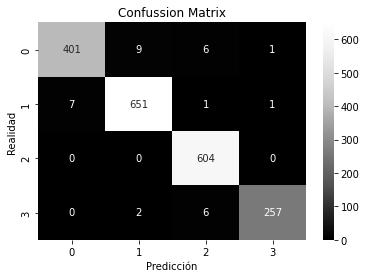

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       417
           1       0.98      0.99      0.98       660
           2       0.98      1.00      0.99       604
           3       0.99      0.97      0.98       265

    accuracy                           0.98      1946
   macro avg       0.98      0.98      0.98      1946
weighted avg       0.98      0.98      0.98      1946



In [21]:
x_train,x_test,y_train,y_test = gp.data_transform(df,"clusters",PowerTransformer(),
                                test_size=0.3,
                                skip_x=[x for x in df.columns if x not in vars_rf])

dtc = RandomForestClassifier().fit(x_train,y_train)
pred = dtc.predict(x_test)

co2.new_classification_report(y_test,pred)

de manera generalizada:

In [22]:
metricas = ["accuracy","precision_micro","recall_micro","f1_micro"]
gp.cross_validation_report(RandomForestClassifier(),x_train,y_train,scv,metricas)

----------(Cross Validation Metrics Report)----------
GLOBAL VIEW:
  - accuracy_medio: 0.978 (+/- 0.003 std)
  - precision_micro_medio: 0.977 (+/- 0.003 std)
  - recall_micro_medio: 0.978 (+/- 0.003 std)
  - f1_micro_medio: 0.977 (+/- 0.003 std)


# GradientBoostingClassifier:
de manera puntual:

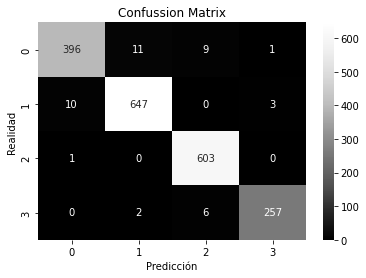

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       417
           1       0.98      0.98      0.98       660
           2       0.98      1.00      0.99       604
           3       0.98      0.97      0.98       265

    accuracy                           0.98      1946
   macro avg       0.98      0.97      0.98      1946
weighted avg       0.98      0.98      0.98      1946



In [23]:
x_train,x_test,y_train,y_test = gp.data_transform(df,"clusters",PowerTransformer(),
                                test_size=0.3,
                                skip_x=[x for x in df.columns if x not in vars_xgb])

dtc = GradientBoostingClassifier().fit(x_train,y_train)
pred = dtc.predict(x_test)

co2.new_classification_report(y_test,pred)

de manera generalizada:

In [24]:
metricas = ["accuracy","precision_micro","recall_micro","f1_micro"]
gp.cross_validation_report(GradientBoostingClassifier(),x_train,y_train,scv,metricas)

----------(Cross Validation Metrics Report)----------
GLOBAL VIEW:
  - accuracy_medio: 0.975 (+/- 0.004 std)
  - precision_micro_medio: 0.975 (+/- 0.004 std)
  - recall_micro_medio: 0.975 (+/- 0.004 std)
  - f1_micro_medio: 0.975 (+/- 0.003 std)


# DecisionTreeClassifier:
de manera puntual:

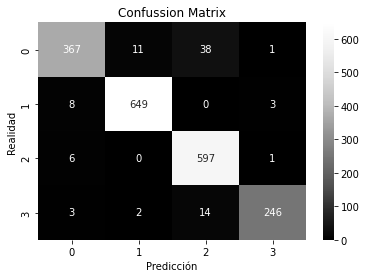

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       417
           1       0.98      0.98      0.98       660
           2       0.92      0.99      0.95       604
           3       0.98      0.93      0.95       265

    accuracy                           0.96      1946
   macro avg       0.96      0.95      0.95      1946
weighted avg       0.96      0.96      0.95      1946



In [116]:
x_train,x_test,y_train,y_test = gp.data_transform(df,"clusters",PowerTransformer(),
                                test_size=0.3,
                                skip_x=[x for x in df.columns if x not in vars_dt])

dtc = DecisionTreeClassifier().fit(x_train,y_train)
pred = dtc.predict(x_test)

co2.new_classification_report(y_test,pred)

de manera generalizada:

In [26]:
metricas = ["accuracy","precision_micro","recall_micro","f1_micro"]
gp.cross_validation_report(DecisionTreeClassifier(),x_train,y_train,scv,metricas)

----------(Cross Validation Metrics Report)----------
GLOBAL VIEW:
  - accuracy_medio: 0.969 (+/- 0.004 std)
  - precision_micro_medio: 0.968 (+/- 0.003 std)
  - recall_micro_medio: 0.968 (+/- 0.005 std)
  - f1_micro_medio: 0.969 (+/- 0.004 std)


Miramos las métricas de cada estimador por clase y las comparamos de manera generalizada para k folds:

In [6]:
listadelistas = [vars_dt,vars_xgb,vars_rf]
co2.multiclass_report_bycluster(df,"clusters",listadelistas,estimadores_elegidos,"Precision",10,True,0)

,0,1,2,3
DecisionTreeClassifier(),0.950000,0.970588,0.984772,0.931034
GradientBoostingClassifier(),0.944444,0.975610,0.989848,0.964286
RandomForestClassifier(),0.968553,0.980676,0.994949,0.976190


In [7]:
co2.multiclass_report_bycluster(df,"clusters",listadelistas,estimadores_elegidos,"Recall",10,True,0)

,0,1,2,3
DecisionTreeClassifier(),0.962264,0.975610,0.970,0.964286
GradientBoostingClassifier(),0.968553,0.975610,0.975,0.964286
RandomForestClassifier(),0.968553,0.985366,0.980,0.976190


In [8]:
co2.multiclass_report_bycluster(df,"clusters",listadelistas,estimadores_elegidos,"F1",10,True,0)

,0,1,2,3
DecisionTreeClassifier(),0.949686,0.973236,0.974874,0.958580
GradientBoostingClassifier(),0.953271,0.975610,0.982368,0.964286
RandomForestClassifier(),0.971787,0.985437,0.987406,0.976190


CONCLUSIÓN:
Si comparamos las métricas medias del cross validation podemos apreciar que:

1. El que mejor accuracy tiene es el RandomForestClassifier con 0.978 y dispersión de +/- 0.003
2. El que mejor precisión tiene es el RandomForestClassifier con 0.977 y dispersión de +/- 0.003
3. El que mejor recall tiene es el RandomForestClassifier con 0.978 y dispersión de +/- 0.003
4. Como tenía que ser, el RandomForestClassifier tiene mejor f1_score con 0.977 y dispersión de +/- 0.003

Por tanto, esta vez el elegido sería el RandomForestClassifier, pues aunque todos están cerca y tiene buenas métricas es el que ofrece valores más altos y con una menor dispersión entre cada una de las predicciones.